In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 
from sklearn.metrics import accuracy_score,recall_score,precision_score, f1_score

In [2]:
# importando a base de dados
df = pd.read_csv('dados_produtos.csv')

In [3]:
df.head()

,product_name,rating,rating_count,purchased
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  100 non-null    object 
 1   rating        100 non-null    float64
 2   rating_count  100 non-null    int64  
 3   purchased     100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB


In [5]:
df.describe() # exibe as estatísticas dos dados

,rating,rating_count,purchased
count,100.000000,100.000000,100.00
mean,4.056900,2536.670000,0.55
std,0.588344,1458.312544,0.50
min,3.020000,10.000000,0.00
25%,3.580000,1433.250000,0.00
50%,4.105000,2424.000000,1.00
75%,4.505000,3773.000000,1.00
max,5.000000,4977.000000,1.00


<Axes: xlabel='product_name', ylabel='rating'>

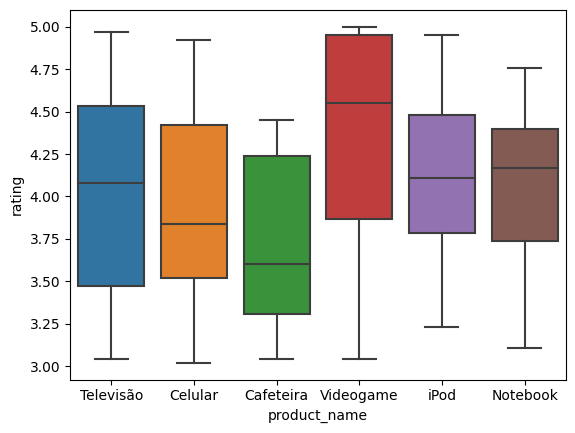

In [6]:
# Análise com box plot 
sns.boxplot(x=df['product_name'],y=df['rating'])

In [7]:
df.isnull().sum() # verificando se tem valores que sao nulos

product_name    0
rating          0
rating_count    0
purchased       0
dtype: int64

In [8]:
df.isna().sum() # verificando se tem valores que não são numeros

product_name    0
rating          0
rating_count    0
purchased       0
dtype: int64

In [9]:
# selecionando apenas as colunas numericas do dataframe
col_n = df.select_dtypes(include='number') # 

In [11]:
correlacao = col_n.corr()
correlacao

,rating,rating_count,purchased
rating,1.000000,0.051993,0.032637
rating_count,0.051993,1.000000,0.129694
purchased,0.032637,0.129694,1.000000


<Axes: >

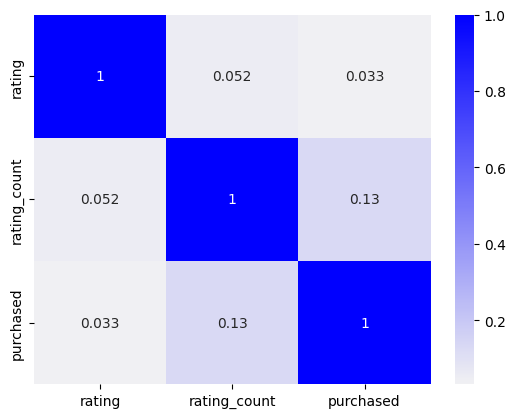

In [12]:
# plotando o grafico de correlação
color = sns.color_palette('light:blue',as_cmap=True)
sns.heatmap(correlacao,cmap=color,annot=True) # plota a matriz de correlação